In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)

/Users/dylan/Envs/21-Machine-Learning-gA7xhWqj/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(
    include_top=True, 
    weights='imagenet')

In [3]:
# Default Image Size for VGG19
# Image size is defined in the docs here: https://keras.io/applications/#vgg19
image_size = (224, 224)

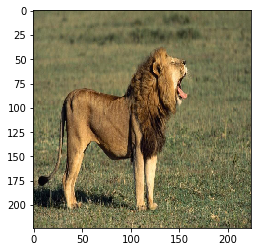

In [4]:
# Load the image and resize to the input dimensions that VGG19
# was trained with
image_path = os.path.join("Images", "lion.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02129165', 'lion', 0.9924986), ('n02437312', 'Arabian_camel', 0.0016058432), ('n02091831', 'Saluki', 0.0007926494), ('n02090721', 'Irish_wolfhound', 0.0006550615)]


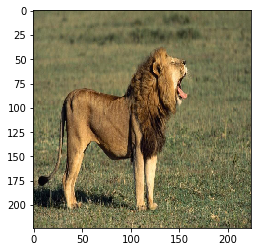

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=4)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0]) 

Predicted: [('n09428293', 'seashore', 0.5250249), ('n09421951', 'sandbar', 0.20374662), ('n09332890', 'lakeside', 0.1191026)]


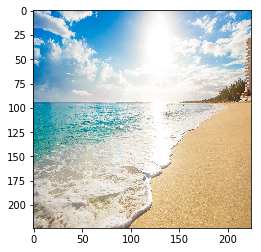

In [8]:
image_path = os.path.join("Images", "Experiences_Beach.jpg")
predict(image_path)